# LECTURE 05: Quasar's position

You measure the position of a quasar $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## MODULES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
# USEFULL FUNCTIONS

def likelihood(x, m, s):
    return np.prod(norm.pdf(x, m, s))

def log_likelihood(x, m, s):
    return -np.sum((x - m)**2 / (2 * s**2))

# Weighted mean
def w_mean(x, s):
    return np.sum(x / s**2) / np.sum(1 / s**2)

# Error on the weighted mean
def err_w_mean(s):
    return 1 / np.sqrt(np.sum(1 / s**2))

# Rough numerical differentation, y = f(x) is differentatied with respect to x to order n
# Hint: is advised to have x evenly spaced
def num_diff(x, y, n=1):
    i, f = int((n - 1) / 2), int((n - 1) / 2 + .5) # n-1 to have the correct length in dx
    dx, dy = np.diff(x), np.diff(y, n) # y must have at least length n+1
    return dy / dx[i:dx.size-f]**n

# 1 - ESTIMATE THE TRUE MEAN OF A SAMPLE
We compare different methods:

    - searching for the maximum of the likelihood function;
    - searching for the maximum of the log-likelihood function;
    - computing the arithmetic mean of the sample.

In [3]:
N = 25
mu, sigma = 1., .2

data = norm.rvs(mu, sigma, N)

Text(0.5, 0, '$\\mu$')

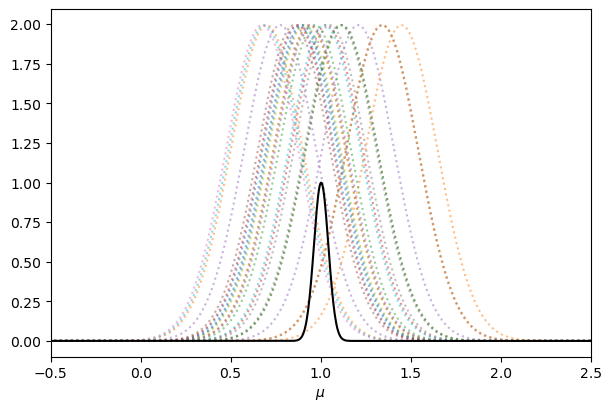

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

dm = 2
mean = np.linspace(mu - dm, mu + dm, num=1000)

for x in data:
    y = norm.pdf(x, mean, sigma)
    ax.plot(mean, y, ':', alpha=.5)

L, logL = [], []
for m in mean:
    L.append(likelihood(data, m, sigma))
    logL.append(log_likelihood(data, m, sigma))

L, logL = np.array(L), np.array(logL)
ax.plot(mean, L / L.max(), color='k')

ax.set_xlim(-.5, 2.5)

ax.set_xlabel('$\mu$')

In [5]:
i_L, i_logL = np.argmax(L), np.argmax(logL)

mu_max = mean[i_L]
mu_mle = data.mean()

Likelihood and log-likelihood are maximized by the same value, at index: 500 500


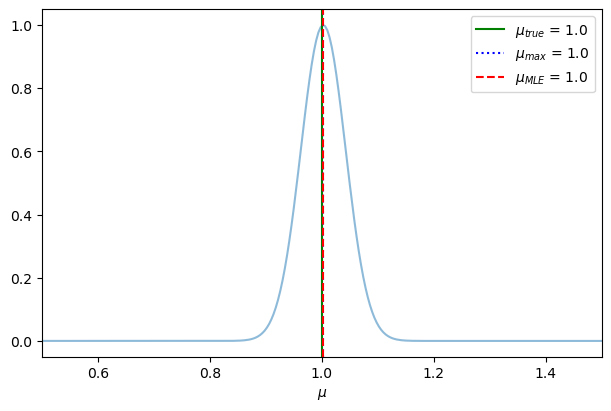

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

ax.plot(mean, L / L.max(), alpha=.5)

ax.axvline(mu, ls='-', color='g', label='$\mu_{true}$ = ' + f'{mu:.3}')
ax.axvline(mean[i_L], ls=':', color='b', label='$\mu_{max}$ = ' + f'{mu_max:.3}')
ax.axvline(data.mean(), ls='--', color='r', label='$\mu_{MLE}$ = ' + f'{mu_mle:.3}')

ax.set_xlim(.5, 1.5)

ax.legend()
ax.set_xlabel('$\mu$')

print('Likelihood and log-likelihood are maximized by the same value, at index:', i_L, i_logL)

# 2 - CHECK THE FISHER MATRIX ERROR

In [7]:
# Compute the Fisher information matrix through a numerical differentation

dL = num_diff(mean, logL, 2)[i_L - 1] # index to evaluete it in the maximum, taking into account the shortening of the array
fisher = 1 / np.sqrt(-dL)
print(f'Fisher Information: {fisher:.3}')

err_est = sigma / np.sqrt(N)
print(f'Estimator: {err_est:.3}')

Fisher Information: 0.04
Estimator: 0.04


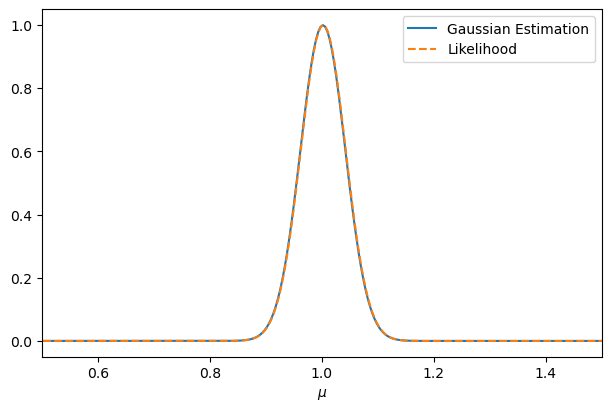

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

gauss_estimated = norm.pdf(mean, mu_max, fisher) * np.sqrt(2 * np.pi * fisher ** 2)

ax.plot(mean, gauss_estimated, label='Gaussian Estimation')
ax.plot(mean, L / L.max(), ls='--', label='Likelihood')

ax.set_xlim(.5,1.5)

ax.legend()
ax.set_xlabel('$\mu$')
plt.show()

# 3 - HETEROSCEDASTIC ERROR
We repeat the previous analysis considering a sample with variable standard deviation (i.e. errors are heteroscedastic). Let's assume that each measurment has a $\sigma _i$ that is normally distributed with mean $0.2$ and standard deviation $0.05$.

In [9]:
N = 25
mu = 1.

sigma = norm.rvs(.2, .05, N)
data = norm.rvs(mu, sigma, N)

Text(0.5, 0, '$\\mu$')

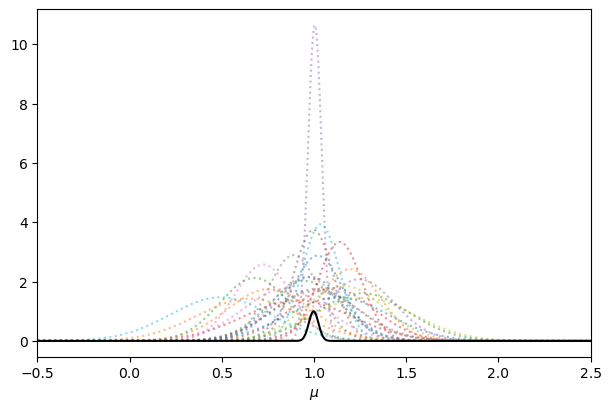

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

dm = 2
mean = np.linspace(mu - dm, mu + dm, num=1000)

for x, s in zip(data, sigma):
    y = norm.pdf(x, mean, s)
    ax.plot(mean, y, ':', alpha=.5)

L, logL = [], []
for m in mean:
    L.append(likelihood(data, m, sigma))
    logL.append(log_likelihood(data, m, sigma))

L, logL = np.array(L), np.array(logL)
ax.plot(mean, L / L.max(), color='k')

ax.set_xlim(-.5, 2.5)

ax.set_xlabel('$\mu$')

In [11]:
i_L, i_logL = np.argmax(L), np.argmax(logL)

mu_max = mean[i_L]
mu_mle = w_mean(data, sigma)

dL = num_diff(mean, logL, 2)
fisher = 1 / np.sqrt(-dL)[0]
print(f'Fisher Information: {fisher:.3}')

err_est = err_w_mean(sigma)
print(f'Estimator: {err_est:.3}')

Fisher Information: 0.0259
Estimator: 0.0259


Likelihood and log-likelihood are maximized by the same value, at index: 499 499


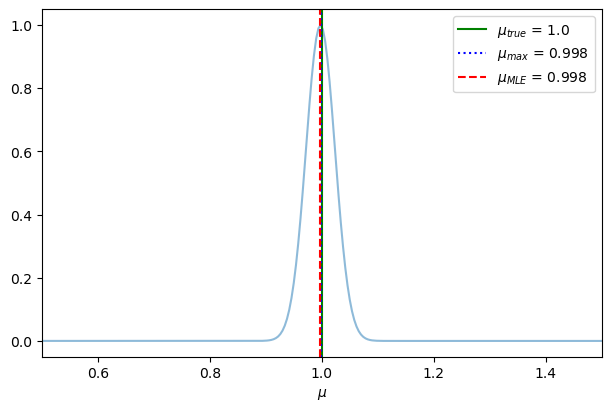

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

ax.plot(mean, L / L.max(), alpha=.5)

ax.axvline(mu, ls='-', color='g', label='$\mu_{true}$ = ' + f'{mu:.3}')
ax.axvline(mu_max, ls=':', color='b', label='$\mu_{max}$ = ' + f'{mu_max:.3}')
ax.axvline(mu_mle, ls='--', color='r', label='$\mu_{MLE}$ = ' + f'{mu_mle:.3}')

ax.set_xlim(.5, 1.5)

ax.legend()
ax.set_xlabel('$\mu$')

print('Likelihood and log-likelihood are maximized by the same value, at index:', i_L, i_logL)